In [1]:
import pandas as pd

In [2]:
cna = pd.read_csv('data_CNA.txt', sep='\t', index_col=0)
fusion = pd.read_csv('data_fusions.txt', sep='\t')
ext = pd.read_csv('data_mutations_extended.txt', sep='\t')
print(cna.shape, fusion.shape, ext.shape)

(964, 1778) (819, 9) (17472, 64)


/tmp/ipykernel_1959179/1600377234.py:3: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ext = pd.read_csv('data_mutations_extended.txt', sep='\t')


In [3]:
cna.head()

,GENIE-DFCI-003908-234520,GENIE-DFCI-002183-6917,GENIE-DFCI-003551-6941,GENIE-DFCI-001893-6973,GENIE-DFCI-001442-7590,GENIE-DFCI-008878-7812,GENIE-DFCI-009738-7631,GENIE-DFCI-009738-11153,GENIE-DFCI-009914-7662,GENIE-DFCI-008955-7334,...,GENIE-VICC-127229-unk-1,GENIE-VICC-219157-unk-1,GENIE-VICC-120723-unk-1,GENIE-VICC-284753-unk-1,GENIE-VICC-112944-unk-1,GENIE-VICC-426210-unk-1,GENIE-VICC-328713-unk-1,GENIE-VICC-299760-unk-2,GENIE-VICC-395682-unk-2,GENIE-VICC-328557-unk-3
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
ABCB11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ABL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACTG1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

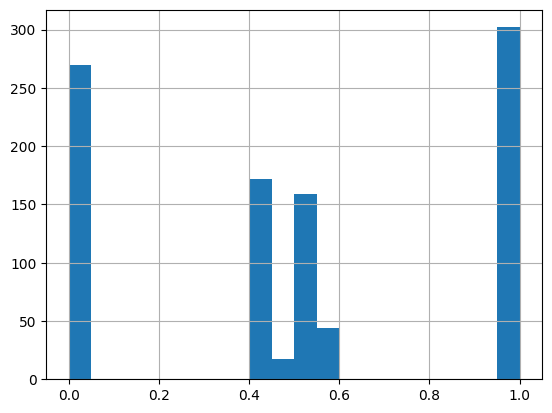

In [4]:
#calculate the % not null for each gene
not_null_dict = {}
for gene in cna.index:
    not_null_dict[gene] = cna.loc[gene].notnull().mean()
#make a histogram of the % not null
pd.Series(not_null_dict).hist(bins=20)



In [5]:
#keep only genes with >0.8 not null
cna = cna.loc[pd.Series(not_null_dict)[pd.Series(not_null_dict)>0.8].index]
print(cna.shape)

(302, 1778)


In [6]:
fusion.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,Tumor_Sample_Barcode,Fusion,DNA_support,RNA_support,Method,Frame
0,ALK,NaN,MSK,GENIE-MSK-P-0003446-T01-IM5,EML4-ALK fusion,yes,unknown,NaN,in frame
1,FLT4,NaN,MSK,GENIE-MSK-P-0003863-T01-IM5,FLT4-intragenic,yes,unknown,NaN,out of frame
2,BRAF,NaN,MSK,GENIE-MSK-P-0004103-T01-IM5,BRAF-SND1 fusion,yes,unknown,NaN,in frame
3,ROS1,NaN,MSK,GENIE-MSK-P-0004336-T01-IM5,CD74-ROS1 fusion,yes,unknown,NaN,in frame
4,TP53,NaN,MSK,GENIE-MSK-P-0004827-T01-IM5,TP53-intragenic,yes,unknown,NaN,unknown


In [7]:
ext.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,FILTER,Polyphen_Prediction,Polyphen_Score,SIFT_Prediction,SIFT_Score,SWISSPROT,n_depth,t_depth,Annotation_Status,mutationInCis_Flag
0,RAD50,10111,DFCI,GRCh37,5,131911578,131911581,+,5_prime_UTR_variant,5'UTR,...,PASS,NaN,NaN,NaN,NaN,NaN,0.0,375.0,SUCCESS,False
1,ARID2,196528,DFCI,GRCh37,12,46245586,46245586,+,missense_variant,Missense_Mutation,...,PASS,benign,0.053,tolerated_low_confidence,0.79,NaN,0.0,445.0,SUCCESS,False
2,FANCB,2187,DFCI,GRCh37,X,14883506,14883506,+,missense_variant,Missense_Mutation,...,PASS,benign,0.275,deleterious,0.02,NaN,0.0,757.0,SUCCESS,False
3,SETD2,29072,DFCI,GRCh37,3,47125359,47125359,+,frameshift_variant,Frame_Shift_Del,...,PASS,NaN,NaN,NaN,NaN,NaN,0.0,537.0,SUCCESS,False
4,POLD1,5424,DFCI,GRCh37,19,50910402,50910402,+,missense_variant,Missense_Mutation,...,PASS,benign,0.023,tolerated,1.00,NaN,0.0,367.0,SUCCESS,False
